# Lab Sheet 4 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM3502-4502-6502 Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), School of [Computer Science](https://www.sheffield.ac.uk/cs "Open web page of School of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") by clicking on the icon on the right, but this notebook is displayed best when opened locally using Jupyter Notebook (e.g. as part of the [Anaconda](https://www.anaconda.com/) distribution which is already installed on the lab computers). <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheets/Lab-Sheet-4.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

<div class="alert alert-block alert-success" id='ILOs'>
<strong>Intended Learning Objectives (ILOs):</strong><br>
    
After completing this Jupyter Notenook you should
    
<ul>
<li>understand the basics if the Fourier amalysis for signals which are periodic in the time domain, i.e. how periodic time-domain signals can be decomposed into fundamental frequencies.
</li>
<li>be able to program periodic wave forms from scratch and compare them to the `scipy` versions.
</li>
<li>gain first experience using the discrete Fourier transform.
</li>
    
<li>understand basic use of the <code>Python</code> libraries 
    <ul>
    <li><a href="https://numpy.org/doc/stable/index.html"><code>Numpy</code></a> commands 
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.floor.html"><code>floor()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html"><code>rfft()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html"><code>fft()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html"><code>fftshift()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html"><code>abs()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.real.html"><code>real()</code></a>,
        <a href="https://numpy.org/doc/stable/reference/generated/numpy.imag.html"><code>imag()</code></a>,
        etc.
    </li>
    <li><a href="https://docs.scipy.org/doc/scipy/index.html"><code>scipy.signal</code></a> commands 
        <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.sawtooth.html"><code>sawtooth()</code></a>, 
        <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.square.html"><code>square()</code></a>, 
        etc.
    </li>
    </ul>
</li>
</ul>
</div>

In [1]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling ((un-)comment if you want)
import numpy as np               # math

## Frequency analysis (of periodic signals)

The **[Fourier](https://en.wikipedia.org/wiki/Joseph_Fourier "Click here to read additional information on Joseph Fourier on Wikipedia") Theorem** states that any periodic signal of frequency $f_0$ can be constructed exactly by adding together ‘sinusoids’ (sine waves) with frequencies $f_0$, $2f_0$, $3f_0$, $4f_0$, $5f_0$, etc. The segmentation of a periodic time domain signal into sinusoids is called [Fourier analysis](https://en.wikipedia.org/wiki/Fourier_analysis "Read additional information on Fourier Analysis on Wikipedia").

Each sinusoid in this ‘[Fourier Series](https://en.wikipedia.org/wiki/Fourier_series "Read additional information about the Fourier Series on Wikipedia")’ are characterised by their
* frequency,
* amplitude, and
* phase.

$f_0$ is termed the *fundamental frequency*.

$2 f_0$, $3 f_0$, $4 f_0$, etc. are termed the *harmonics*.

### The sawtooth signal
The [sawtooth](https://en.wikipedia.org/wiki/Sawtooth_wave "Read additional information on the saw tooth signal on Wikipedia") signal in its most simple form is defined as

\begin{equation}
x_{\mathrm{saw}}(t) = t - \lfloor t \rfloor, \tag{1}
\label{eq:SawtoothSimple}
\end{equation}

with the opertor $\lfloor \cdot \rfloor$, being the floor operator (`np.floor()`). (\ref{eq:SawtoothSimple}) can be redefined to be centred around $0$ as

\begin{equation}
x_{\mathrm{saw}}(t) = 2 \left(t - \lfloor t \rfloor \right) - 1. \tag{2}
\label{eq:SawtoothSimpleCenteredAround0}
\end{equation}

While it should not be a problem to generate the sawtooth signal using equations \eqref{eq:SawtoothSimple} or \eqref{eq:SawtoothSimpleCenteredAround0}, the `scipy` library gives us more flexibility to generate and visualise a sawtooth signals since they can be generated as if they were sine signals. 

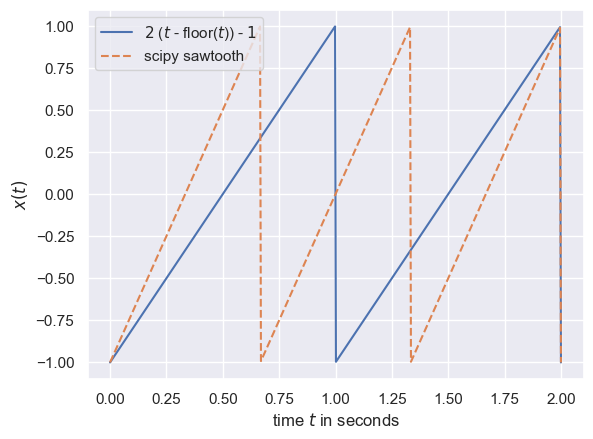

In [2]:
from scipy import signal

t = np.linspace(0, 2, 500)
saw_tooth = 2*(t-np.floor(t))-1

f0 = 1 # frequency in Hz for scipy samtooth
saw_tooth2 = signal.sawtooth(3 * np.pi * f0 * t) # i changed 2 to 3 to visualise the difference
plt.plot(t, saw_tooth, label='$2$ ($t$ - floor($t$)) - $1$')
plt.plot(t, saw_tooth2, '--', label='scipy sawtooth');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

We see in the plot above that as well implementing the sawtooth using equation (2) as using the `scipy` library leads to the same curve (though the `scipy` method provised more fleibility.

<br>
<div class="alert alert-block alert-info">
    
**Task 1: Generating a Sawtooth Signal**
    
Generate a sawtooth signal of length $2$ seconds and a fundamental frequency $f_0 = 200$ Hz using the `scipy` library and play it back.
    
To achieve this, replace the comments indicated by `# ...` in the code below.
    
The code will show the initial $20 \,\mathrm{ms}$ of the time domain signal as well as the spectrum (frequency domain) using the function `np.fft.rfft()`, which calculates the (complex) discrete Fourier Transform (DFT) of a real-valued time series.
</div>

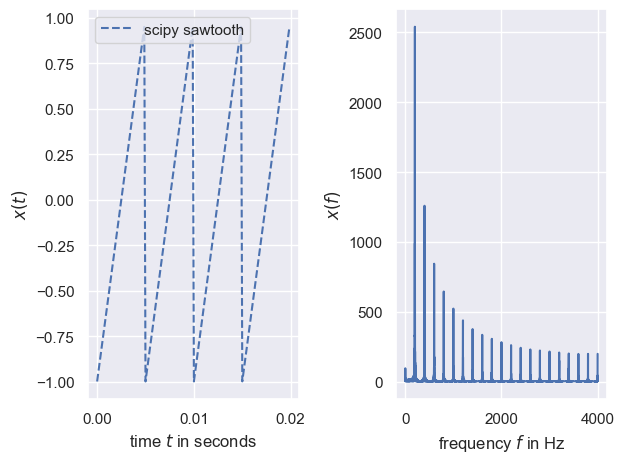

In [3]:
from scipy import signal            # for easy sawtooth signal generation
from IPython import display as ipd  # to playback audio signals

fs= 8000# ...                  # sampling frequency
t = np.linspace(0, 1, fs)       # time vector

f0 = 200 #...                   # frequency in Hz for scipy sawtooth
saw_tooth = signal.sawtooth(2 * np.pi * f0 * t)  # ...

# plot first 20 ms (=160 samples at sampling frequency of 8000 Hz)
plt.subplot(1,2,1)
plt.plot(t[0:160], saw_tooth[0:160], '--', label='scipy sawtooth');
plt.xlabel('time $t$ in seconds'); plt.ylabel('$x(t)$')
plt.legend();

# calculate the spectum (frequency domain representation)
FFT_length = 2**15 # take a power of two which is larger than the signal length
f = np.linspace(0, fs/2, num=int(FFT_length/2+1))
spectrum = np.abs(np.fft.rfft(saw_tooth,n=FFT_length))

# plot the spectrum
plt.subplot(1,2,2)
plt.plot(f,spectrum)
plt.xlabel('frequency $f$ in Hz');plt.ylabel('$x(f)$')

plt.tight_layout() # this allowes for some space for the title text.

# playback sound file (if you want)
ipd.Audio(saw_tooth, rate=fs)

### Constructing a sawtooth signal from its sinusoids

In the following we want to construct the sawtooth signal from it's Fourier Series. The time-reversed sawtooth signal can be described in a simple form by the following Fourier series:

\begin{eqnarray*}
\label{eq:FourierSeriesSawtoothSimple}
x'_{\mathrm{saw}}(t)  &=& \frac{2}{\pi}\left[\sin(\omega_0t) + \frac{\sin(2\omega_0t)}{2} + \frac{\sin(3\omega_0t)}{3} + \cdots\right]\tag{3}\\
     &=& \frac{2}{\pi} \sum_{i=1}^{\infty}\,\frac{\sin(i\omega_0t)}{i}\tag{4}
\end{eqnarray*}

$$
\begin{align}
x'_{\mathrm{saw}}(t)  &= \frac{2}{\pi}\left[\sin(\omega_0t) + \frac{\sin(2\omega_0t)}{2} + \frac{\sin(3\omega_0t)}{3} + \cdots\right] \tag{3} \\
     &= \frac{2}{\pi} \sum_{i=1}^{\infty}\,\frac{\sin(i\omega_0t)}{i} \tag{4}
\end{align}
$$

with $\omega = 2 \pi f$ being the angular frequency, i.e. $\omega_0 = 2 \pi f_0$.

Please note that we will first implement the Fourier Series of the time-reversed sawtooth signal ($x(-t)$) since the equation \eqref{eq:FourierSeriesSawtoothSimple} is simpler. In a next step we will have a look at the Fourier Series in the time direction as defined above.

<br>
<div class="alert alert-block alert-info">
    
**Task 2: Fourier series of Saw-tooth signal**
    
Generate the first four sinusoids from \eqref{eq:FourierSeriesSawtoothSimple} and show that a superposition of these results in a sawtooth signal. For a simple visualisation you could choose $f_s = 8000$ Hz, $f_0=2$ Hz and a length of $2$ seconds for the time vector $\mathbf{t}$. But feel free to play around with these values.
    
Hint: It might be a good idea to realise the sawtooth generation as a function, e.g. with the following interface:<br>
`generateSawTooth(f0=1, length = 2, fs=8000, order=10)`

</div>

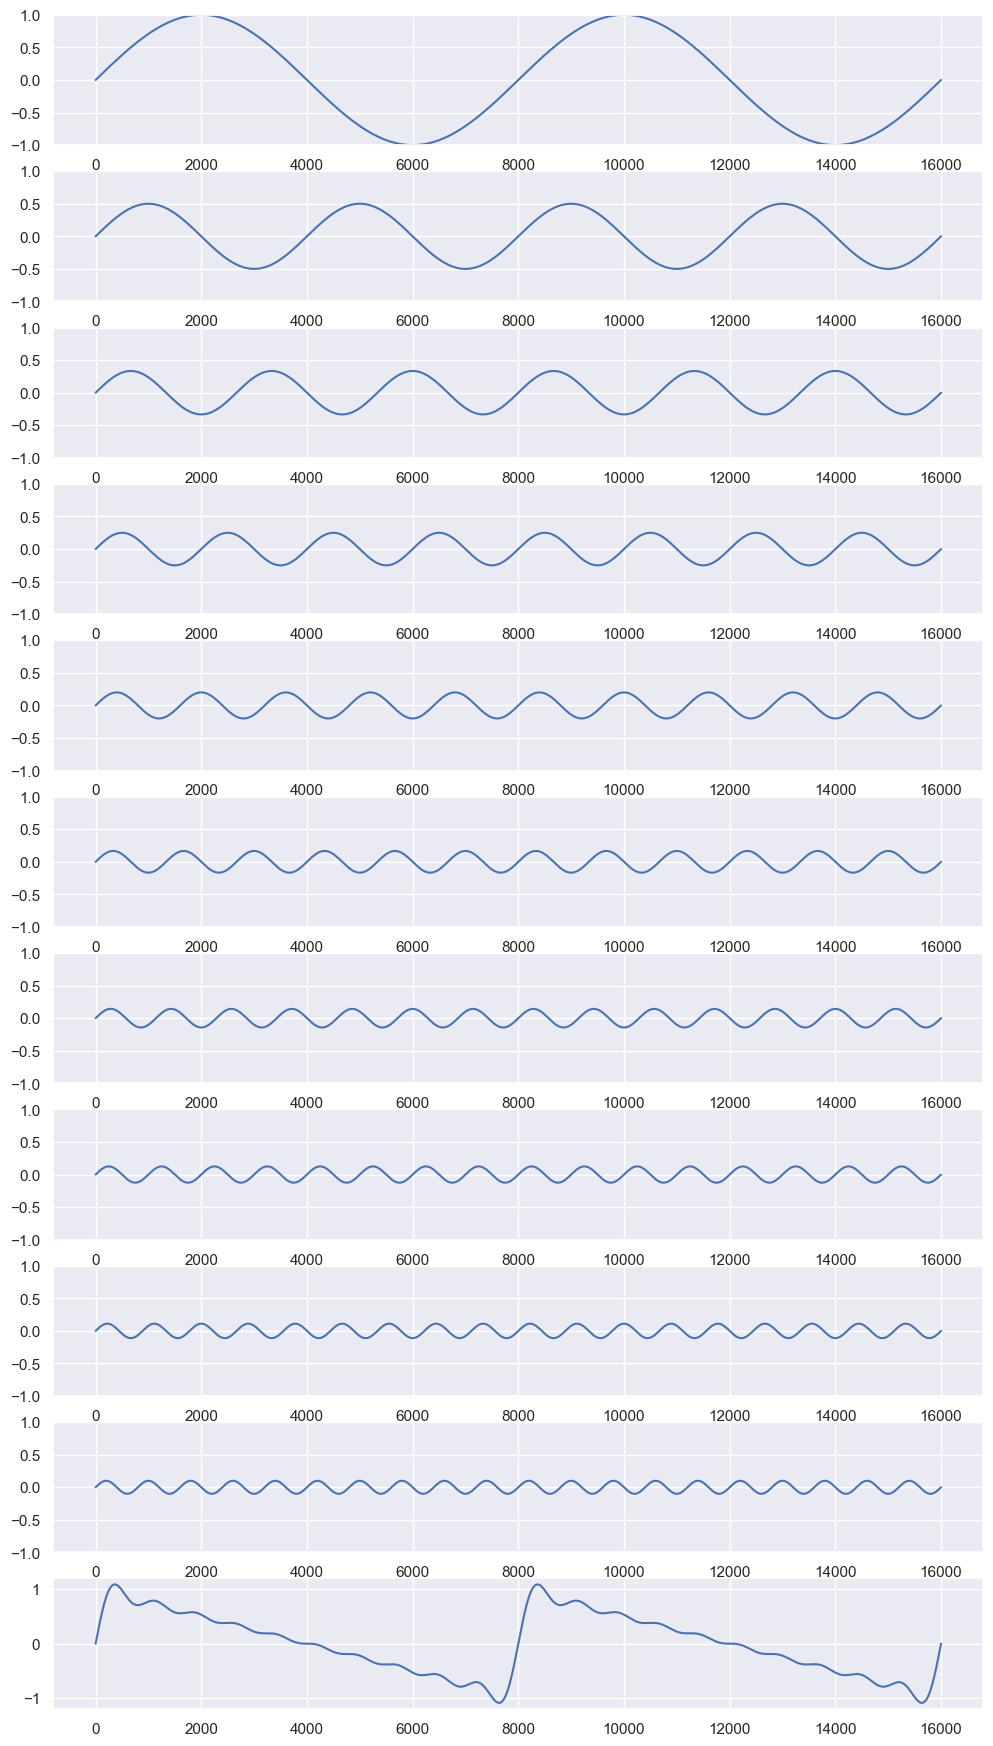

In [32]:


def generate_sine(t, f):
  signal = []
  for i in t:
    # print(f"iterating: {i}")
    x = np.sin(2*np.pi*f*i)
    # print(f"f(x) = {x}")
    signal.append(x)
  return signal

# signal = generate_sine(t,f)

# print(signal)


def generateSawTooth(f0, length, fs, order):
    nrows = order+1
    ncols = 1
    fig, axs = plt.subplots(nrows, ncols, figsize=(12,2*nrows))
    t = np.linspace(0, length, fs*length)
    sines=[]
    for i in range(0, order):
        sine = np.array(generate_sine(t, f0*(i+1)))/(i+1)
        sines.append(sine)
        axs[i].plot(sine)
        axs[i].set_ylim(-1, 1)
    summed_signal = np.sum(sines, axis=0)
    saw = summed_signal*2/np.pi
    plt.plot(saw)
    return saw

saw = generateSawTooth(f0=1, length = 2, fs=8000, order=10)

        

From the lecture we should remember that the sine (and cosine) oscillations can be visualised as projections of a vector from the center of a carthesian coordinate system to the unit circle moving on the unit circle to the $x$ and $y$ axes as visualised below.

<img src="signals-sine-cosine-circle2.gif" alt="Relation between unit circle and the sine/cosine generation." style="width: 500px;"/>
<center><span style="font-size:smaller">
    <b>Fig. 1:</b> Relation between sine and cosins and the (unit) cirle.
</span></center>

If we add  a second sine (here with double frequency ($2\omega_0$) but half the amplitude) on top of the first one, i.e. want to implement $\sin(\omega_0 t) + 0.5 \sin(2\omega_0t)$, this can be interpreted as adding another vector starting from the current value on the unit circle (green point in the left panel of the visualisation below) to a second circle with half the radius (amplitude factor 0.5).

<img src="signals-sine-circle-fourier-superposition2.gif" alt="Relation between unit circle and two sine signals as first two components of saw-tooth Fourier series." style="width: 500px;"/>
<center><span style="font-size:smaller">
    <b>Fig. 2:</b> Superposition of two sine signals of different frequency ('speed') and the relation to the respective cirles.
</span></center>

The center panel of the figure above shows the corresponding time domain signal which is already becoming 'somewhat sawtooth-like'. The right panel shows the spectral content, i.e. two spectral lines at the frequencies of the respective sine signals.

<img src="signals-sine-circle-fourier-superposition4.gif" alt="Relation between unit circle and four sine signals as first four components of saw-tooth Fourier series." style="width: 500px;"/>
<center><span style="font-size:smaller">
    <b>Fig. 3:</b> Superposition of four sine signals of different frequency ('speed') and the relation to the respective cirles.
</span></center>

If we want the saw-tooth signal to start with the part increasing from $0$ to $1$ first this can be achived by

\begin{eqnarray*}
\label{eq:FourierSeriesSawtoothRAisingBeginning}
x_{\mathrm{saw}}(t) &=& -\frac{2h}{\pi}\left[\sin(\omega_0t)-\frac{\sin(2\omega_0t)}{2}+\frac{\sin(3\omega_0t)}{3}\mp \cdots\right]\tag{5}\\
\label{eq:FourierSeriesSawtoothRAisingBeginning2}
 &=& -\frac{2h}{\pi} \sum_{i=1}^{\infty}\,(-1)^{i-1}\frac{\sin(i\omega_0t)}{i}\tag{6}
\end{eqnarray*}

In \eqref{eq:FourierSeriesSawtoothRAisingBeginning} and \eqref{eq:FourierSeriesSawtoothRAisingBeginning2}, $h$ is the height and $\omega = 2 \pi f$ the angular frequency.

<br>
<div class="alert alert-block alert-info">
    
**Task 3: Fourier series of Saw-tooth signal (time-reverse)**
    
Realise a function `generateSawTooth2(f0=1, length = 2, fs=8000, order=10)` implementing equation \eqref{eq:FourierSeriesSawtoothRAisingBeginning}.

</div>

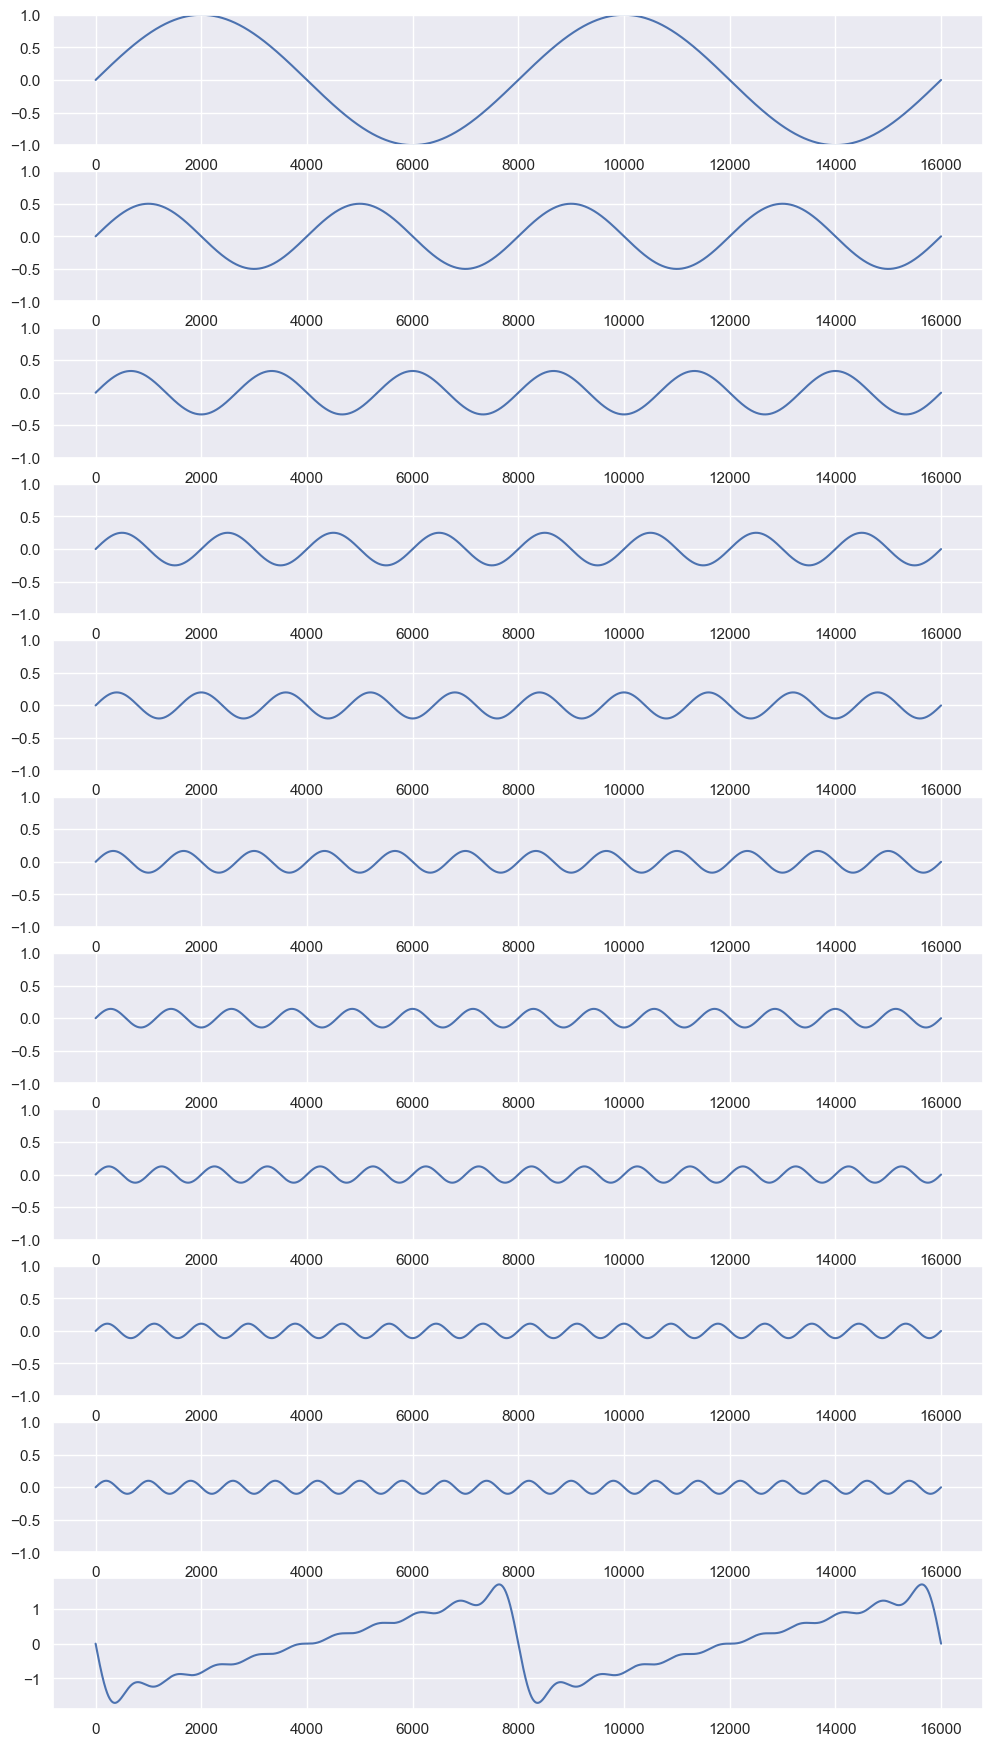

In [38]:

def generateSawTooth2(f0, length, fs, order):
    nrows = order + 1
    ncols = 1
    fig, axs = plt.subplots(nrows, ncols, figsize=(12, 2 * nrows))
    t = np.linspace(0, length, fs * length)
    summed_signal = np.zeros(len(t))
    for i in range(0, order):
        sine = np.array(generate_sine(t, f0 * (i + 1))) / (i + 1)
        if order % 2 != 0:
            summed_signal = summed_signal + sine
        else:
            summed_signal= summed_signal - sine
        axs[i].plot(sine)
        axs[i].set_ylim(-1, 1)
    # summed_signal = np.sum(sines, axis=0)
    saw = summed_signal*-2/np.pi
    plt.plot(summed_signal)
    return summed_signal


saw = generateSawTooth2(f0=1, length=2, fs=8000, order=10)




### Trinangular wave form

Another periodic signal is the triangular wave form:


\begin{eqnarray}
\label{eq:FourierSeriesTriangular}
x_{\mathrm{tri}}(t) &=& \frac{8h}{\pi^2}\left[\sin(\omega_0t)-\frac{1}{3^2}\sin(3\omega_0t)+\frac{1}{5^2}\sin(5\omega_0t)\mp \cdots\right] \tag{7}\\
 &=& \frac{8h}{\pi^2} \sum_{i=1}^{\infty}\,(-1)^{i-1}\frac{\sin((2i-1)\omega_0t)}{(2i-1)^2} \tag{8}
\end{eqnarray}

<br>
<div class="alert alert-block alert-info">
    
**Task 4: Fourier series of Trinangular signal**
    
Realise a function `generateTriangular(f0=1, length = 2, fs=8000, order=10)` implementing equation \eqref{eq:FourierSeriesTriangular} and visualise the resulting wave form.

</div>

In [6]:
# your code here
#
# ...

## (Discrete) Fourier Transform DFT - An example

The discrete Fourier transform (DFT) can be realised by `numpy`'s `np.fft.fft()` command. The discrete Fourier transform (DFT) is used to transform general time series into the frequency domain (even if they are aperiodic). Let's gain a bit experience using the DFT to analyse spectral content.

<br>
<div class="alert alert-block alert-info">
    
**Task 5: Fourier Transform DFT - An example**
  
Create the superposition of the two sinusoidial signals

\begin{eqnarray}
    x(t)             &=& \mathrm{sin}_1(t) + \mathrm{sin}_2(t)
\end{eqnarray}
with 
\begin{eqnarray}
    \mathrm{sin}_1(t)&=&\mathrm{sin}(2 \pi f_1 t)\\
    \mathrm{sin}_2(t)&=&\frac{1}{2}\mathrm{sin}(2 \pi f_2 t+\phi_1)\\
    f_1&=& 1230 \,\mathrm{Hz} \\
    f_2&=&1800 \,\mathrm{Hz} \\
    \phi_1&=& \pi
\end{eqnarray}

Plot time domain signal (e.g. for the first $20 \,\mathrm{ms}$) as well as the spectrum. Which one provides more insight into the signal properties, assuming that you don't know the mathematical description.
    
Hint: The DFT length $L_{\mathrm{DFT}}$ needed for calculating the DFT by using the fast Fourier transform (FFT) algorithm <code>np.fft.fft(x,L_DFT)</code> has to be chosen to be longer then the signal $x$. The FFT algorithms is, in general, fastest if the DFT length $L_{\mathrm{DFT}}$ is a power of $2$. Therefore, you can choose the DFT length to be <code>L_DFT=2**14</code>.
    
Further hint: The spectrum of a real-valued time domain signal is always complex, i.e. you can either plot real and imaginary part or absolute value (and phase).
</div>

In [7]:
# your code here
#
# ...

## Copyright

This notebook is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) to be used during the lecture COM3502-4502-6502 Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), School of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of School of Computer Science, University of Sheffield"). You may download, [clone](https://docs.github.com/en/repositories/creating-and-managing-repositories/cloning-a-repository) or [fork](https://docs.github.com/en/get-started/quickstart/fork-a-repo) it to your computer or private [GitHub](https://github.com/) account.